# **Progress Final Project**

**Kecerdasan Komputasional F** <br>
**Anggota Kelompok:**
1. Nur Hidayati (05111940000028)
2. Amanda Rozi Kurnia (05111940000094)
3. Shahnaaz Anisa Firdaus (05111940000158)



Dataset yang digunakan pada pemodelan Support Vector Machine ini adalah [Fake and Real News Dataset](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset). Dataset ini berisi informasi mengenai data pada artikel. 

# **Tugas Analitik**
Tugas analitik pada pemodelan Machine Learning ini adalah **Klasifikasi**, yaitu menentukan apakah sebuah artikel termasuk ke dalam berita hoax atau tidak.

# **Data Preparation**

----

Sebelum melakukan pemodelan dengan algoritma Support Vector Machine, ada beberapa persiapan yang harus dilakukan, yaitu import library, load dataset dan seleksi fitur yang digunakan.


## **Import Library**

In [7]:
# Do the necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import nltk

## **Load Dataset**
Setelah melakukan import library, load dataset.

In [2]:
# Load data
df_true = pd.read_csv("../Dataset/Original Data/True.csv")
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
# Load data
df_fake = pd.read_csv("../Dataset/Original Data/Fake.csv")
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Dari hasil di atas, dapat diketahui bahwa **Fake and Real News** mempunyai beberapa atribut yang berisi informasi mengenai sebuah artikel.

## **Telaah Data**
Untuk mendapatkan ringkasan fitur yang terdapat pada dataset, ringkasan ini mencakup daftar semua kolom dengan tipe datanya dan jumlah nilai bukan nol di setiap kolom. 

### **Tipe Data**

In [4]:
# data types from each columns
print(df_true.dtypes)

title      object
text       object
subject    object
date       object
dtype: object


In [5]:
print(df_fake.dtypes)

title      object
text       object
subject    object
date       object
dtype: object


Dari hasil di atas, kita dapat mengetahui bahwa tipe data dari kolom yang ada di dataset di atas adalah object (string).

### **Data Info**
Menghitung ukuran (jumlah baris dan kolom) dari dataset.

In [8]:
# Data True Info
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [9]:
# the number of rows
print(len(df_true))

21417


In [10]:
# the number of columns
print(len(df_true.columns))

4


In [11]:
# Data Fake Info
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [12]:
# the number of rows
print(len(df_fake))

23481


In [13]:
# the number of columns
print(len(df_fake.columns))

4


## **Missing Values**

In [14]:
# find missing values
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [15]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

Dari hasil tersebut, dapat dilihat bahwa tidak terdapat missing values pada dataset yang digunakan.

## **Konstruksi Data**

### **Feature Selection**

Selanjutnya, melakukan convert huruf kapital menjadi huruf kecil pada kolom title dan text. Kemudian melakukan drop pada kolom subject dan date.

In [18]:
# Menghapus fitur date dan subject pada true df
df_true_2 = df_true.drop(columns = ["date", "subject"])
df_true_2.head()

,title,text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...


In [19]:
# Menghapus fitur date dan subject pada fake df
df_fake_2 = df_fake.drop(columns = ["date", "subject"])
df_fake_2.head()

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...


### **Menambahkan Fitur**
Setelah load dataset, kita menambahkan kolom **status** pada kedua dataset, yaitu Fake dan True. Kolom status bernilai 1 untuk kelas Hoax dan bernilai 0 untuk kelas Fakta.



In [20]:
# create IsFake column for true df, value is zero
zero_data = np.zeros(shape=(len(df_true_2),1))
d_true = pd.DataFrame(zero_data, columns=["IsFake"])
d_true.head()

,IsFake
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [21]:
# create IsFake column for fake df, value is one
ones_data = np.ones(shape=(len(df_fake_2),1))
d_fake = pd.DataFrame(ones_data, columns=["IsFake"])
d_fake.head()

,IsFake
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [22]:
# Combine IsFake column with df_true_2
df_true_3 = pd.concat([df_true_2, d_true], axis=1)
df_true_3.head()

,title,text,IsFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0.0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0.0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0.0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0.0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0.0


In [23]:
# Combine IsFake column with df_fake_2
df_fake_3 = pd.concat([df_fake_2, d_fake], axis=1)
df_fake_3.head()

,title,text,IsFake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1.0


In [24]:
# Menghitung jumlah headlines pada true df
df_true_3["title"].value_counts()

Factbox: Trump fills top jobs for his administration                                14
Factbox: Contenders for senior jobs in Trump's administration                        8
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday     8
Factbox: International reaction to arrest of Reuters reporters in Myanmar            6
Highlights: The Trump presidency on April 21 at 6:12 p.m. EDT/2212 GMT               5
                                                                                    ..
Obama, on last trip to Europe, warns against nationalism, populism                   1
A post-Trump SEC could shake up current policy                                       1
U.S. panel urges probe on whether China weakening U.S. militarily                    1
Trump team weighs 'infrastructure bank' to fund projects: Trump adviser              1
Indonesia to buy $1.14 billion worth of Russian jets                                 1
Name: title, Length: 20826, dtype: int64

In [25]:
# Menghitung jumlah headlines pada fake df
df_fake_3["title"].value_counts()

MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead                                                                  6
ELEMENTARY SCHOOL PLANS ‘BLACKS ONLY’ FIELD TRIP TO COLLEGE FOR THIRD GRADERS                                                                                          4
FORMER FBI ASST DIRECTOR: “Jim Comey ‘Danced With The Devil’…I’m Glad He’s Gone” [VIDEO]                                                                               4
AN INSIDE LOOK AT OBAMA’S 5-STAR SUMMER VACATION RETREAT: Meanwhile…62% Of Americans Won’t Be Taking A Vacation This Summer                                            3
GARY JOHNSON: Meet The “Creepy” Pro-Amnesty, Anti-Gun, Pro-TPP, Pro-Abortion, Democrat Party Operative And His Anti-Gun Rights, Friend Of Clinton’s VP Pick [VIDEO]    3
                                                                                                                                                           

### **Menggabungkan True dan Fake**

In [26]:
# combine both as one dataframe called df
df = pd.concat([df_true_3, df_fake_3], axis=0)
df.head()

,title,text,IsFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0.0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0.0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0.0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0.0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0.0


In [27]:
# Menghitung jumlah baris yang bernilai true (0) dan fake (1)
df["IsFake"].value_counts()

1.0    23481
0.0    21417
Name: IsFake, dtype: int64

### **Menghapus data NaN**

In [28]:
# Menghapus data NaN
df.loc[df['text'] == " ", 'text']= np.nan
df.loc[df['text'] == "  ", 'text']= np.nan

In [29]:
df_2 = df.dropna()
df_2

,title,text,IsFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0.0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0.0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0.0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0.0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0.0
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,1.0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,1.0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,1.0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,1.0


In [30]:
df_2["IsFake"].value_counts()

1.0    22851
0.0    21416
Name: IsFake, dtype: int64

In [31]:
df_2["text"].value_counts()

(Reuters) - Highlights for U.S. President Donald Trump’s administration on Thursday: The United States drops a massive GBU-43 bomb, the largest non-nuclear bomb it has ever used in combat, in Afghanistan against a series of caves used by Islamic State militants, the Pentagon says. Trump says Pyongyang is a problem that “will be taken care of” amid speculation that North Korea is on the verge of a sixth nuclear test. Military force cannot resolve tension over North Korea, China warns, while an influential Chinese newspaper urges Pyongyang to halt its nuclear program in exchange for Beijing’s protection. The Trump administration is focusing its North Korea strategy on tougher economic sanctions, possibly including intercepting cargo ships and punishing Chinese banks doing business with Pyongyang, U.S. officials say. Trump says “things will work out fine” between the United States and Russia, a day after declaring U.S.-Russian relations may be at an all-time low. Trump signals he could be

In [37]:
df2point5 = df_2.rename(columns = {"text":"txt"})
df_3 = df2point5["txt"]
df_3

0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3        WASHINGTON (Reuters) - Trump campaign adviser ...
4        SEATTLE/WASHINGTON (Reuters) - President Donal...
                               ...                        
23476    21st Century Wire says As 21WIRE reported earl...
23477    21st Century Wire says It s a familiar theme. ...
23478    Patrick Henningsen  21st Century WireRemember ...
23479    21st Century Wire says Al Jazeera America will...
23480    21st Century Wire says As 21WIRE predicted in ...
Name: txt, Length: 44267, dtype: object

In [38]:
srs = df_2.squeeze(1)
srs

,title,text,IsFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0.0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0.0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0.0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0.0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0.0
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,1.0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,1.0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,1.0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,1.0


In [39]:
# Get first 1000 characters of text
df_3 = df_2["text"].str.slice(start = 0, stop = 1000)
df_3.head()

0    WASHINGTON (Reuters) - The head of a conservat...
1    WASHINGTON (Reuters) - Transgender people will...
2    WASHINGTON (Reuters) - The special counsel inv...
3    WASHINGTON (Reuters) - Trump campaign adviser ...
4    SEATTLE/WASHINGTON (Reuters) - President Donal...
Name: text, dtype: object

In [40]:
df_4 = pd.concat([df2point5, df_3], axis=1).drop(columns="txt")
df_4.head()

,title,IsFake,text
0,"As U.S. budget fight looms, Republicans flip t...",0.0,WASHINGTON (Reuters) - The head of a conservat...
1,U.S. military to accept transgender recruits o...,0.0,WASHINGTON (Reuters) - Transgender people will...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,0.0,WASHINGTON (Reuters) - The special counsel inv...
3,FBI Russia probe helped by Australian diplomat...,0.0,WASHINGTON (Reuters) - Trump campaign adviser ...
4,Trump wants Postal Service to charge 'much mor...,0.0,SEATTLE/WASHINGTON (Reuters) - President Donal...


In [41]:
df_4["text"].value_counts()

(Reuters) - Highlights for U.S. President Donald Trump’s administration on Thursday: The United States drops a massive GBU-43 bomb, the largest non-nuclear bomb it has ever used in combat, in Afghanistan against a series of caves used by Islamic State militants, the Pentagon says. Trump says Pyongyang is a problem that “will be taken care of” amid speculation that North Korea is on the verge of a sixth nuclear test. Military force cannot resolve tension over North Korea, China warns, while an influential Chinese newspaper urges Pyongyang to halt its nuclear program in exchange for Beijing’s protection. The Trump administration is focusing its North Korea strategy on tougher economic sanctions, possibly including intercepting cargo ships and punishing Chinese banks doing business with Pyongyang, U.S. officials say. Trump says “things will work out fine” between the United States and Russia, a day after declaring U.S.-Russian relations may be at an all-time low. Trump signals he could be

### **Fake and Real Posts**

IsFake
0.0    21416
1.0    22851
Name: text, dtype: int64


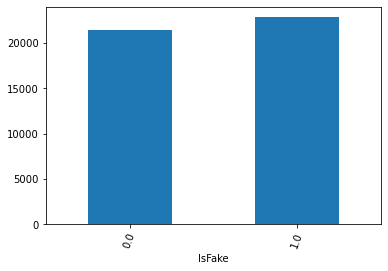

In [43]:
print(df_4.groupby(['IsFake'])['text'].count())
df_4.groupby(['IsFake'])['text'].count().plot(kind='bar')
plt.xticks(rotation=70)
plt.show()

In [47]:
x = df_4.drop(columns="IsFake")
x

,title,text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...
...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...


In [48]:
y = df_4["IsFake"]
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
23476    1.0
23477    1.0
23478    1.0
23479    1.0
23480    1.0
Name: IsFake, Length: 44267, dtype: float64

## **Export New Dataset**

In [175]:
# Menyimpan data olahan ke csv
x.to_csv("../Dataset/Construction Data/features.csv", index=False)

In [176]:
y.to_csv("../Dataset/Construction Data/labels.csv", index=False)